## 回家作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可降低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)


請用Python 回答以下問題

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請使用Pandas 統計男女別的平均 Credit.Amount
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?

In [2]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [3]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [4]:
## SELECT Sex...Marital.Status, AVG(Credit.Amount	) FROM df GROUP BY Sex...Marital.Status;
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean()

Sex...Marital.Status
1    2896.327684
2    3694.981685
3    1993.360000
Name: Credit.Amount, dtype: float64

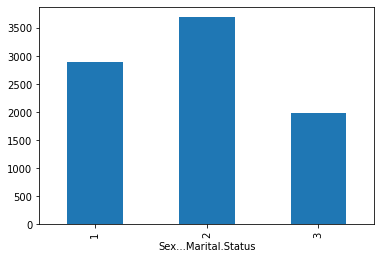

In [5]:
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean().plot(kind = 'bar')

In [6]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [8]:
y = df.iloc[:,0]
y.head()

497    1
756    0
580    0
833    0
602    1
Name: Creditability, dtype: int64

In [9]:
X = df.iloc[:,1:]
X.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_y = clf.predict(X)

In [12]:
(y == pred_y ).sum() / len(y)

0.798

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred_y)

0.798

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
clf1 = RandomForestClassifier()
clf1.fit(X,y)

clf2 = GradientBoostingClassifier()
clf2.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
pred_y1 = clf1.predict(X)
pred_y2 = clf2.predict(X)

In [16]:
accuracy_score(y, pred_y1)

1.0

In [17]:
accuracy_score(y, pred_y2)

0.93

In [18]:
len(X.columns)

20

## 主成分分析

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

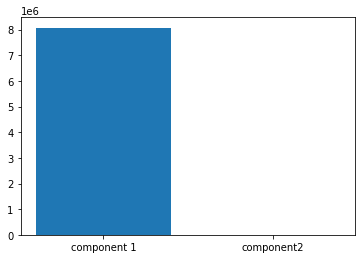

In [43]:
from matplotlib import pyplot as plt
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()

In [21]:
pca.components_

array([[-2.01956244e-05,  2.50391428e-03,  1.47920110e-06,
        -3.24785057e-05,  9.99996827e-01,  1.59499249e-05,
        -1.23836860e-05, -1.10911984e-04, -3.06591799e-07,
        -8.00839718e-07,  2.23847060e-07,  1.22174890e-04,
         2.07536079e-04, -1.02078733e-05,  2.99376044e-05,
        -6.92305176e-06,  0.00000000e+00,  2.60308900e-06,
         4.91638374e-05,  2.19567447e-06],
       [ 3.53109045e-03, -3.60650139e-01,  8.83228175e-03,
         2.08452770e-03,  7.08734090e-04,  5.64788028e-03,
         2.33625552e-02, -3.19690353e-03, -4.60170388e-04,
        -1.86162595e-03,  2.25534209e-02,  1.35546189e-03,
         9.31926664e-01, -1.25463196e-03,  1.26317664e-02,
         4.85036445e-03,  0.00000000e+00,  4.21784989e-03,
         6.61197481e-03,  7.58475874e-04]])

In [22]:
X_reduced = pca.transform(X)
X_reduced.shape

(500, 2)

In [23]:
X_reduced[0:3]

array([[-1.13413283e+03, -1.24062275e+00],
       [-2.29210577e+03, -1.54152988e+00],
       [ 3.93194164e+03, -9.65273810e+00]])

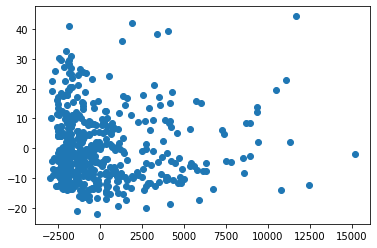

In [24]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced[:,0],X_reduced[:,1])

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_reduced,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

In [40]:
import numpy as np
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),np.arange(y_min, y_max, 1))

In [41]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Component 2')

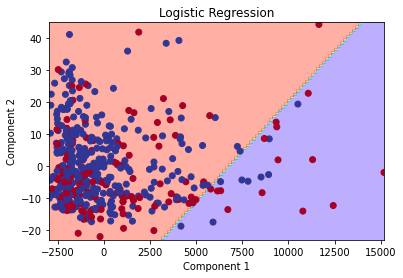

In [42]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_reduced,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Text(0, 0.5, 'Component 2')

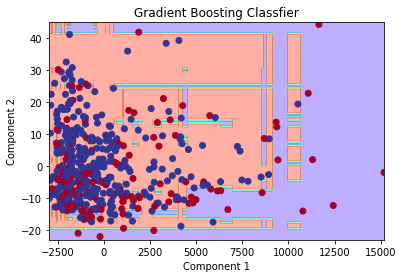

In [34]:
import numpy as np
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),np.arange(y_min, y_max, 1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Gradient Boosting Classfier')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [28]:
pred_y = clf.predict(X_reduced)

In [29]:
accuracy_score(y, pred_y)

0.862

In [32]:
from sklearn.metrics import confusion_matrix
clf.classes_
confusion_matrix(y,pred_y)

array([[ 74,  69],
       [  0, 357]])

In [33]:
df['Creditability'].value_counts()

1    357
0    143
Name: Creditability, dtype: int64

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_reduced[:,0:1],y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
pred_y = clf.predict(X_reduced[:,0:1])

In [47]:
accuracy_score(y, pred_y)

0.822

## 類神經網路

In [49]:
import numpy as np
X = np.array([20, 1000, 3])

In [51]:
W1 = np.random.randn(3,4)
W1

array([[-1.36743439, -1.18785915, -0.90434638, -0.10332626],
       [ 1.13442268,  0.14199281, -1.02603955,  0.73104353],
       [ 0.21465623, -0.92159102, -1.36470448, -0.17500917]])

In [57]:
O1 = np.dot(X,W1)
O1

array([ 1107.71795904,   115.47085527, -1048.22059293,   728.45197542])

In [56]:
def relu(e):
  return np.maximum(e,0)

relu(np.array([-2,-1,2]))

array([0, 0, 2])

In [58]:
relu(O1)

array([1107.71795904,  115.47085527,    0.        ,  728.45197542])

In [59]:
W2 = np.random.randn(4,1)

In [60]:
np.dot(O1, W2)

array([-1042.13685833])

## MNIST

In [62]:
from sklearn.datasets import load_digits
digits = load_digits()

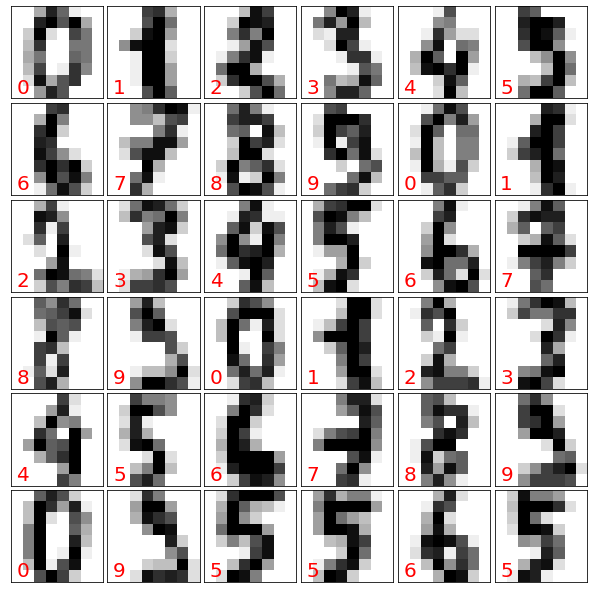

In [64]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [66]:
digits.data.shape

(1797, 64)

In [67]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [68]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

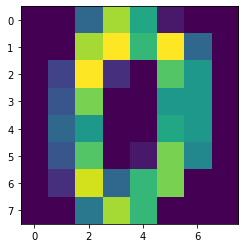

In [71]:
plt.imshow(digits.data[0].reshape(8,8))

In [72]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 3000)
clf.fit(digits.data, digits.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pred_y = clf.predict(digits.data)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, pred_y)

1.0

In [207]:
from sklearn.preprocessing import StandardScaler
a = np.array([[50],[60],[70]])
sc = StandardScaler()
sc.fit_transform(a)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [208]:
(a - a.mean()) / a.std()

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [209]:
sc.transform(np.array([[90]]))

array([[3.67423461]])

In [149]:
scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)

In [191]:
# X:64 -> L1:30 -> L2:30 -> L3:30 -> Output:10
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier((30,30,30), max_iter = 3000)
clf.fit(X_scaled, digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [192]:
pred_y = clf.predict(X_scaled)

In [193]:
accuracy_score(digits.target, pred_y)

1.0

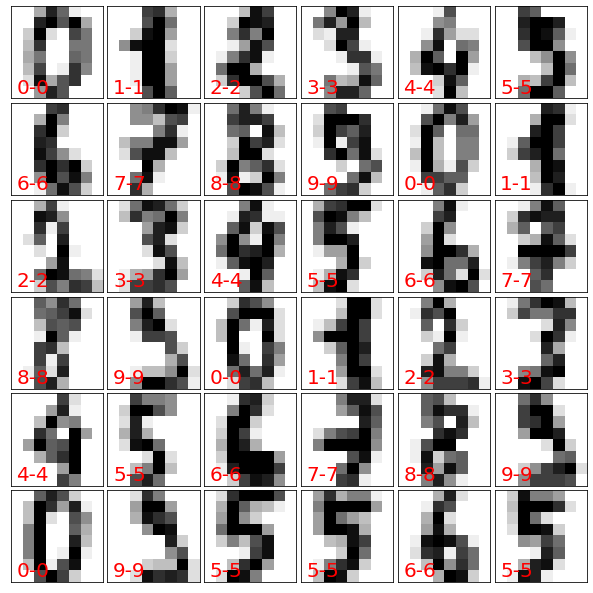

In [194]:
predicted = clf.predict(X_scaled)
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [195]:
clf.coefs_[0].shape

(64, 30)

In [196]:
clf.coefs_[1].shape

(30, 30)

In [197]:
clf.coefs_[2].shape

(30, 30)

In [198]:
clf.coefs_[3].shape

(30, 10)

In [199]:
clf.coefs_[0]

array([[ 8.14930642e-05,  1.78141891e-06,  1.47899090e-07, ...,
         1.43087621e-15, -3.27797486e-04, -2.81232816e-15],
       [-6.50742128e-02, -1.29047155e-01, -2.87267903e-01, ...,
        -4.86836133e-02,  1.89973756e-01, -2.23742999e-01],
       [-7.73804997e-02, -1.85234077e-02, -1.21470929e-01, ...,
        -6.26812109e-02, -2.58308920e-01, -1.02878863e-01],
       ...,
       [-3.37713982e-01,  2.68978283e-01,  3.49641560e-02, ...,
         1.80806787e-01, -2.44526439e-01, -1.66626897e-01],
       [-3.07252266e-01, -9.45043270e-03,  7.45471432e-02, ...,
         1.37780155e-01, -2.48628263e-01, -2.72233098e-01],
       [-3.71016804e-01, -4.71416996e-02, -7.06769289e-03, ...,
        -3.95285530e-02,  1.24087429e-01, -1.96479133e-01]])

In [96]:
! wget https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/4.jpg

--2020-10-31 03:31:39--  https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695 [image/jpeg]
Saving to: ‘4.jpg’

4.jpg               100%[===================>]     695  --.-KB/s    in 0s      

2020-10-31 03:31:39 (21.3 MB/s) - ‘4.jpg’ saved [695/695]



In [200]:
from PIL import Image
img = Image.open('4.jpg').convert('L')

In [201]:
import numpy as np
im = np.array(img)

In [202]:
im2 = ((255 - im) / 256 * 16).astype(int)

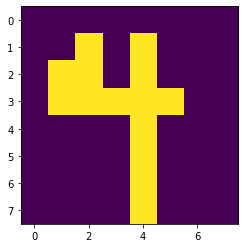

In [203]:
plt.imshow(im2)

In [204]:
im2 = im2.reshape((1,64))

In [205]:
im3 = scaler.transform(im2)

In [206]:
clf.predict(im3)

array([4])

In [189]:
im3.dtype

dtype('float64')